In [1]:
import torch
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import os
import pathlib
import json
import glob
from collections import defaultdict

In [2]:
#experiment_name = 'lottery_1a33bed04f87d8f96b8774aebc4aa8d6' # lottery_snipvgg11old
#basepath = os.path.join('/home/levaid/bigstorage/open_lth_data', experiment_name)

#hparams = pathlib.Path(os.path.join(basepath, 'replicate_1', 'level_0/main/hparams.log')).read_text()
#print(hparams)


In [3]:
from matplotlib import rc, rcParams
# rc('font',**{'family':['serif'],'serif':['Computer Modern Roman']})
rc('font', **{'family':'serif','serif':'Computer Modern'})
rc('text', usetex=True)

In [ ]:
def create_df_from_init_experiments(model_name):
    
    prettify_dict = {'snip_vgg11': 'SNIP_init',
                     'sparse_vgg11': 'sparse_init',
                     'snip_vgg16': 'SNIP_init',
                     'sparse_vgg16': 'sparse_init',
                     'snip_resnet20': 'SNIP_init',
                     'sparse_resnet20': 'sparse_init'}
    init_df_data = []
    init_basepath = '/home/levaid/bigstorage/open_lth_data'
    experiments = [folder for folder in os.listdir(init_basepath) if model_name in folder]
    print(experiments)
    for experiment_name in experiments:
        for level in [l for l in os.listdir(os.path.join(init_basepath, experiment_name)) if 'perf' in l]:
            accuracies = pd.read_csv(os.path.join(init_basepath, experiment_name, level), names = ['measure', 'unk', 'perf'])[1:]
            top_accuracy = accuracies.query('measure == "test_accuracy"')['perf'].max()
            pruning_percent = (1/2) ** int(level.split('_')[1])
            init_df_data += [(experiment_name, f'level_{level.split("_")[1]}', 
                         top_accuracy, round(pruning_percent, ndigits=3),
                         prettify_dict['_'.join(experiment_name.split('_')[-2:])] )]

    init_df = pd.DataFrame(init_df_data, columns = ['replicate_id', 'level', 'accuracy', 'unpruned', 'pruning_strategy'])

    return(init_df)

In [ ]:
dfs = []

dfs.append(create_df_from_experiment('lottery_b3b7f61e9c219199cf6e3dbf9abf6499', 'Resnet34 on tiny-imagenet'))

# snip_init_df = create_df_from_init_experiments('snip_vgg11_newgrad')
# sparse_init_df = create_df_from_init_experiments('snip_vgg11_oldgrad')
# df = snip_df.append(sparse_df).append(snip_init_df).append(sparse_init_df).query('unpruned > 0.007')
df = pd.concat(dfs)
# df['schedule'] = df['pruning_strategy'].apply(lambda row: 'train' if 'LTH' in row else 'init')
# df['strategy'] = df['pruning_strategy'].apply(lambda row: 'weight*grad' if 'SNIP' in row else 'weight')
df['strategy'] = df['pruning_strategy']

plt.figure(figsize=(6,4), facecolor='white', dpi=300)
plt.tight_layout()
ax = sns.lineplot(x="level", y="accuracy", data=df, hue='strategy', marker = 'o')
ax.set_xticklabels([str(x) for x in sorted(df['unpruned'].unique(), reverse=True)])
ax.set_title('Pruning strategies on VGG-11, CIFAR-10')
ax.set_xlabel('Global pruning ratio')
# ax.set_xlim((0,9))
# ax.set_ylim((0.75, 0.82))
#ax.set_xticks(sorted(ax.get_xticks(), reverse=True))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize('small')
ax.grid()

In [ ]:
snip_df

In [ ]:
sparse_init_df.query("level == 'level_4'")

In [ ]:
snip_df = create_df_from_experiment('lottery_e6dc86114120217d26411ed6aa033318', 'SNIP global LTH')
sparse_df = create_df_from_experiment('lottery_31ef6d1c09469a516b6742d9fe99305e', 'sparse global LTH')
snip_init_df = create_df_from_init_experiments('snip_resnet20')
sparse_init_df = create_df_from_init_experiments('sparse_resnet20')
df = snip_df.append(sparse_df).append(snip_init_df).append(sparse_init_df).query('unpruned > 0.007')
df['schedule'] = df['pruning_strategy'].apply(lambda row: 'train' if 'LTH' in row else 'init')
df['strategy'] = df['pruning_strategy'].apply(lambda row: 'weight*grad' if 'SNIP' in row else 'weight')

plt.figure(figsize=(6,4), facecolor='white', dpi=300)
plt.tight_layout()
ax = sns.lineplot(x="level", y="accuracy", data=df, style = 'schedule', hue='strategy', marker = 'o')
ax.set_xticklabels([str(x) for x in sorted(df['unpruned'].unique(), reverse=True)])
ax.set_title('Pruning strategies on Resnet20, CIFAR-10')
ax.set_xlabel('Global pruning ratio')
# ax.set_xlim((0,9))
ax.set_ylim((0.69, 0.81))
#ax.set_xticks(sorted(ax.get_xticks(), reverse=True))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize('small')
ax.grid()

In [ ]:
experiment_name = 'lottery_1a33bed04f87d8f96b8774aebc4aa8d6' # lottery_snipvgg11old
basepath = os.path.join('/home/levaid/bigstorage/open_lth_data', experiment_name)

hparams = pathlib.Path(os.path.join(basepath, 'replicate_1', 'level_0/main/hparams.log')).read_text()
print(hparams)


In [ ]:

glob.glob(open_lth_data_path + '*')
ex = 'lottery_c3cf3b3877f61b4c12643d8d7d78e549'

In [ ]:
dets = H.get_hparams_from_experiment(ex, open_lth_data_path, [])
print(dets)

In [17]:
import helper_functions as H
open_lth_data_path = '/home/levaid/bigstorage/open_lth_data/'

In [ ]:
dfs = []
total_weights = 270896 # for resnet20
names_dic = {}
for ex in os.listdir(open_lth_data_path):
    if ex == 'old_experiments_pre_sept':
        continue
    try:
        model_name, pruning_strategy, levels, fraction, *epochs = H.get_hparams_from_experiment(ex, open_lth_data_path, ['model_name', 'pruning_strategy', 'pruning_levels', 'pruning_fraction', 'training_steps'])
    except (IndexError, FileNotFoundError):
        continue
    if model_name == 'cifar_resnet_20':
        results = create_df_from_experiment(ex, pruning_strategy)
        results['epochs_per_level'] = H.convert_epoch_iter(epochs[-1], to='ep', its_per_epoch=390.25)
        results['experiment_name'] = ex
        results['levels'] = levels-1
        results['fraction'] = float(fraction)
        results['no. of params'] = int(0.5**(levels-1)*total_weights)
        dfs += [results]

In [ ]:
df_unfiltered = pd.concat(dfs).query('fraction >= 0.45 and levels != -1')

df_unfiltered['pruning_strategy'] = df_unfiltered['pruning_strategy'].apply(lambda s: s.replace('_', ' '))
df_unfiltered['strategy'] = df_unfiltered['pruning_strategy'].apply(lambda s: 'w*g' if s == 'snip global' else 'w')
df_unfiltered['iters_per_level'] = df_unfiltered['epochs_per_level'] * 391
df_unfiltered

In [ ]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    
    # display(df_unfiltered.query("level == 'level_1'"))
    pass


In [ ]:
baseline_nopruning_df = df_unfiltered.query("unpruned == 1.0 and level == 'level_0' and epochs_per_level == 60")
baseline_nopruning_df['strategy'] = 'no pruning\nat 60ep'
helper_df = baseline_nopruning_df.copy()
helper_df['epochs_per_level'] = 0
baseline_nopruning_df = baseline_nopruning_df.append(helper_df)
baseline_nopruning_df['levels'] = 0

In [ ]:
df = df_unfiltered.query("level == 'level_posttrain'").sort_values('strategy').append(baseline_nopruning_df)
print(sorted(df['levels'].unique()))
plt.figure(figsize=(6,4), facecolor='white', dpi=300)
plt.tight_layout()
ax = sns.lineplot(x="epochs_per_level", y="accuracy", data=df, style='strategy', hue='levels', marker = 'o',
                  err_style='band', err_kws={'alpha':0.2}, palette = sns.color_palette("husl", len(df['levels'].unique())))
ax.set_title('Pruning strategies on Resnet20, CIFAR-10, with 60 epochs post training\nbased on 11 levels of pruning with .5 global remaining ratio per level')
ax.set_xlabel('Epochs per level')
ax.set_xlim((0, 10))
ax.set_ylim((0.8, 0.85))


handles, labels = ax.get_legend_handles_labels()
for i, l in enumerate(labels):
    if l in [str(n) for n in range(12)]:
        labels[i] = l + f' ({str(int(total_weights/2**int(l)))})'
ax.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# ax.set_ylim((0.69, 0.81))
#ax.set_xticks(sorted(ax.get_xticks(), reverse=True))
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize('small')
    

ax.grid()
    
ax2 = ax.twiny()
ax2 = sns.lineplot(x="iters_per_level", y="accuracy", data=df, hue='strategy', marker = '', err_style=None, linewidth=0)
ax2.legend_.remove()
ax2.set_xlabel('Iterations per level')
ax2.set_xlim(np.array(ax.get_xlim())*391)
ax2.grid(axis='x', alpha = 0.3, ls = '--')


In [301]:
import importlib
importlib.reload(H)
dfs = []
total_weights = 14715584 # for vgg16 cifar 10
names_dic = {}
for ex in os.listdir(open_lth_data_path):
    if ex == 'old_experiments_pre_sept':
        continue
    try:
        model_name, pruning_strategy, levels, fraction, gradient_weight, *epochs = H.get_hparams_from_experiment(ex, open_lth_data_path, ['model_name', 'pruning_strategy', 'pruning_levels', 'pruning_fraction', 'pruning_gradient_weight', 'training_steps'])
    except (IndexError, FileNotFoundError):
        continue

    results = H.create_df_from_experiment(ex, pruning_strategy)
    results['epochs_per_level'] = H.convert_epoch_iter(epochs[-1], to='ep', its_per_epoch=390.25)
    results['experiment_name'] = ex
    if pruning_strategy == 'sparse_global':
        gradient_weight = 0.0
    results['gradient weight'] = float(gradient_weight)
    results['fraction'] = float(fraction)
    results['model_name'] = model_name
    results['no. of params'] = results['unpruned'] * total_weights
    dfs += [results]

replicate_2 level_1 [Errno 2] File /home/levaid/bigstorage/open_lth_data/lottery_a9851d1fc4de9809192546e9d2e01bd4/replicate_2/level_1/main/logger does not exist: '/home/levaid/bigstorage/open_lth_data/lottery_a9851d1fc4de9809192546e9d2e01bd4/replicate_2/level_1/main/logger'
replicate_4 level_1 [Errno 2] File /home/levaid/bigstorage/open_lth_data/lottery_a9851d1fc4de9809192546e9d2e01bd4/replicate_4/level_1/main/logger does not exist: '/home/levaid/bigstorage/open_lth_data/lottery_a9851d1fc4de9809192546e9d2e01bd4/replicate_4/level_1/main/logger'
replicate_1 level_2 [Errno 2] File /home/levaid/bigstorage/open_lth_data/lottery_17844d7e3715a5a8e1ec702b30bdd3cc/replicate_1/level_2/main/logger does not exist: '/home/levaid/bigstorage/open_lth_data/lottery_17844d7e3715a5a8e1ec702b30bdd3cc/replicate_1/level_2/main/logger'
replicate_3 level_2 [Errno 2] File /home/levaid/bigstorage/open_lth_data/lottery_17844d7e3715a5a8e1ec702b30bdd3cc/replicate_3/level_2/main/logger does not exist: '/home/levaid

In [302]:
df_unfiltered = pd.concat(dfs).query('fraction == 0.5')

df_unfiltered['pruning_strategy'] = df_unfiltered['pruning_strategy'].apply(lambda s: s.replace('_', ' '))
df_unfiltered['strategy'] = df_unfiltered['pruning_strategy'].apply(lambda s: 'w*g' if s == 'snip global' else 'w')
df_unfiltered['level'] = df_unfiltered['level'].apply(lambda x: f'level {int(x.split("_")[-1]):02}' if 'posttrain' not in x else f'{" ".join(x.split("_"))}')
#df_unfiltered['gradient weight'] = df_unfiltered['gradient weight'].apply(lambda x: '0' if x == 0.0 else 'not 0')
#df_unfiltered = df_unfiltered.query('`gradient weight` == [0, 1, 2, 3]')
df_unfiltered = df_unfiltered.query("level != 'level posttrain'")

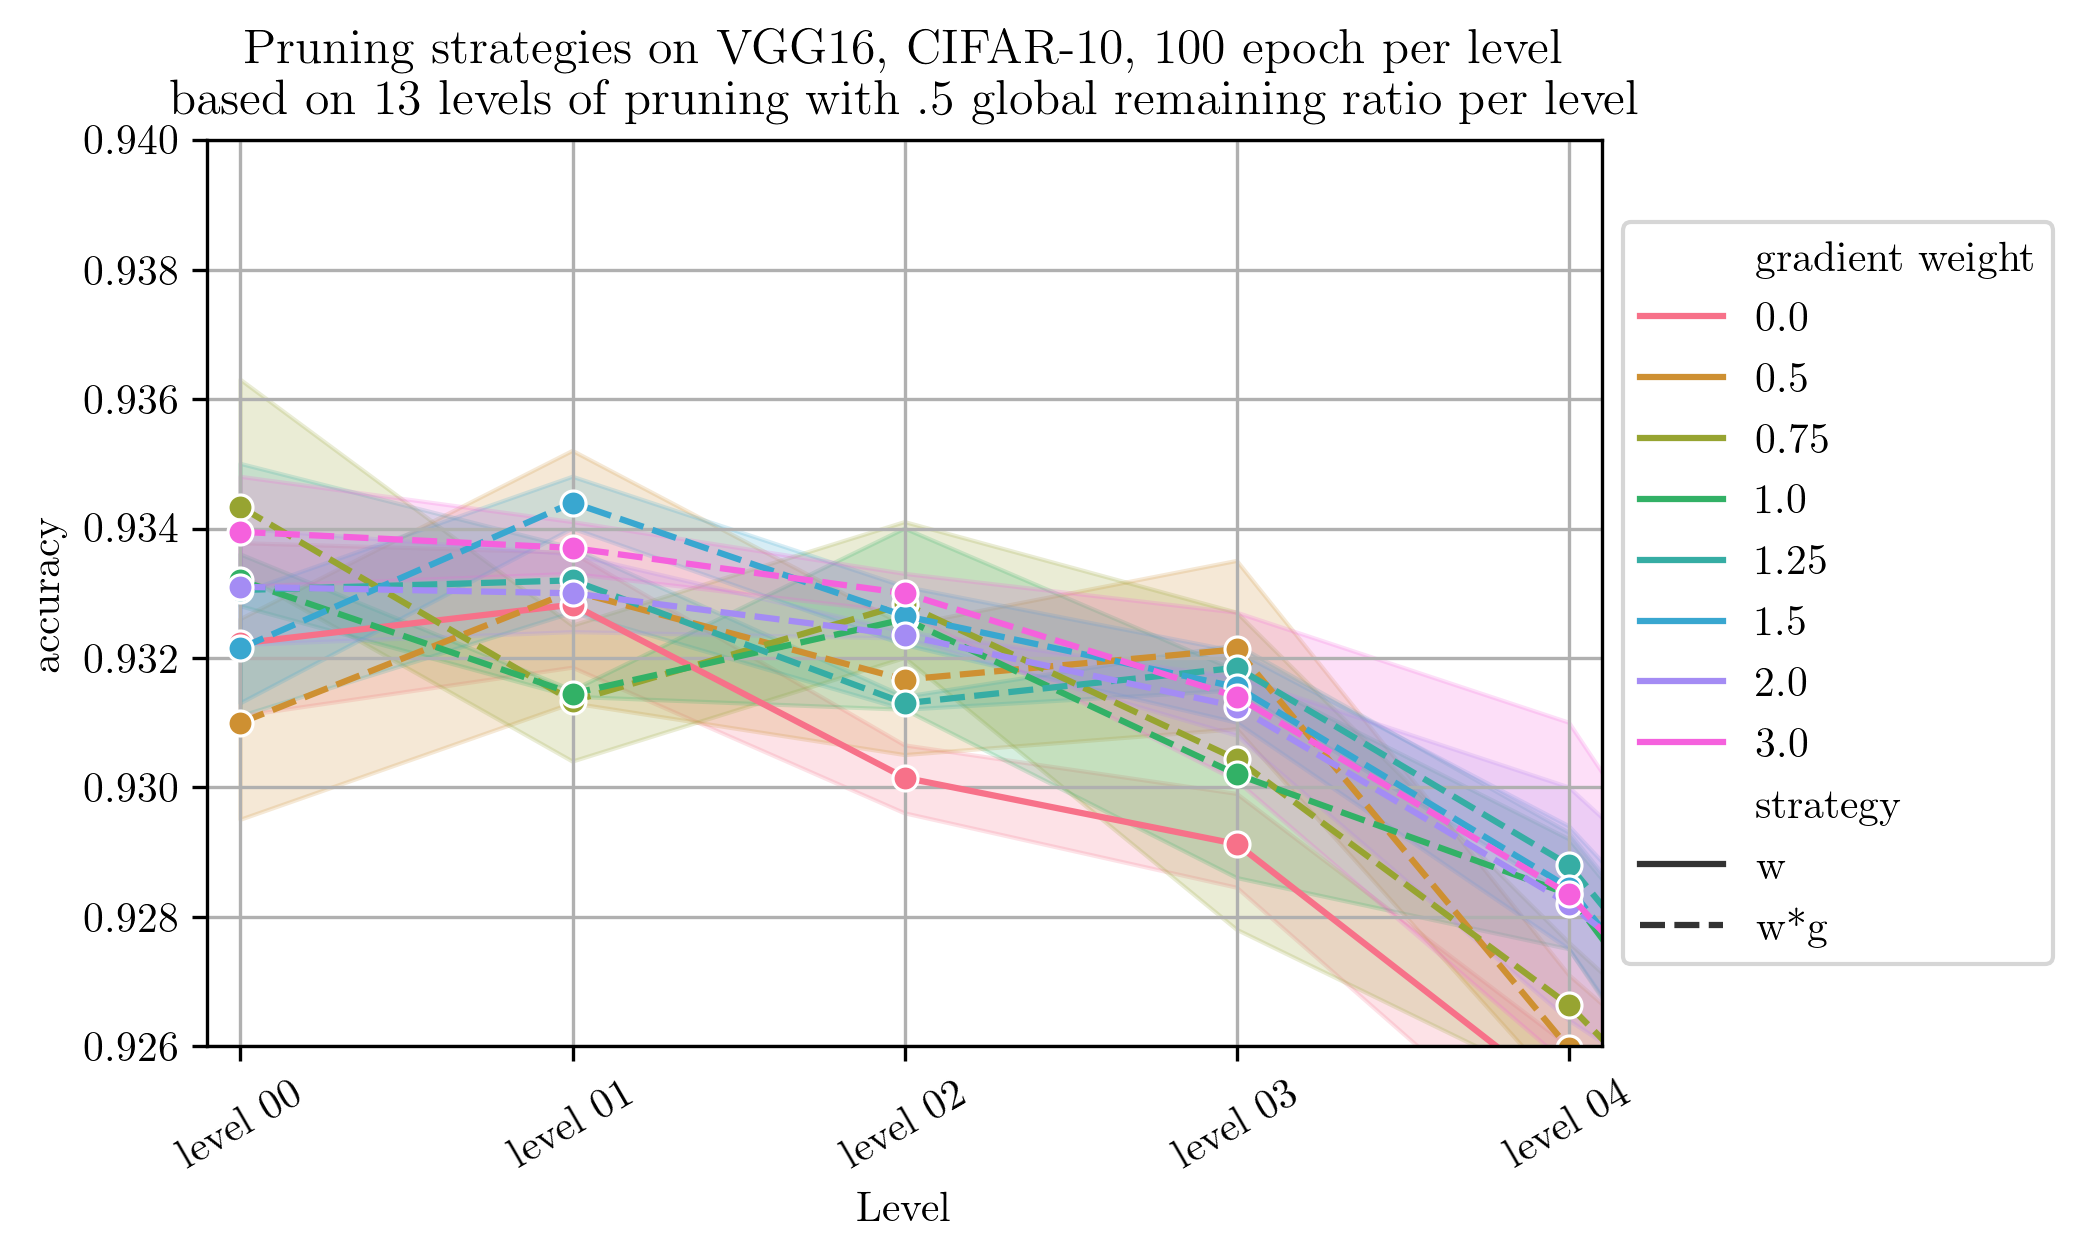

In [303]:
df = df_unfiltered.query('model_name == "cifar_vgg_16"').sort_values(['gradient weight', 'unpruned'])
plt.figure(figsize=(6,4), facecolor='white', dpi=300)
plt.tight_layout()
ax = sns.lineplot(x="level", y="accuracy", data=df, style='strategy', hue='gradient weight', marker = 'o', ci=99,
                  err_style='band', err_kws={'alpha':0.2}, palette = sns.color_palette("husl", len(df['gradient weight'].unique())))
ax.set_title('Pruning strategies on VGG16, CIFAR-10, 100 epoch per level\nbased on 13 levels of pruning with .5 global remaining ratio per level')
ax.set_xlabel('Level')
ax.legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)
ax.set_ylim((0.926, 0.94))
ax.set_xlim((-0.1, 4.1))
ax.grid()


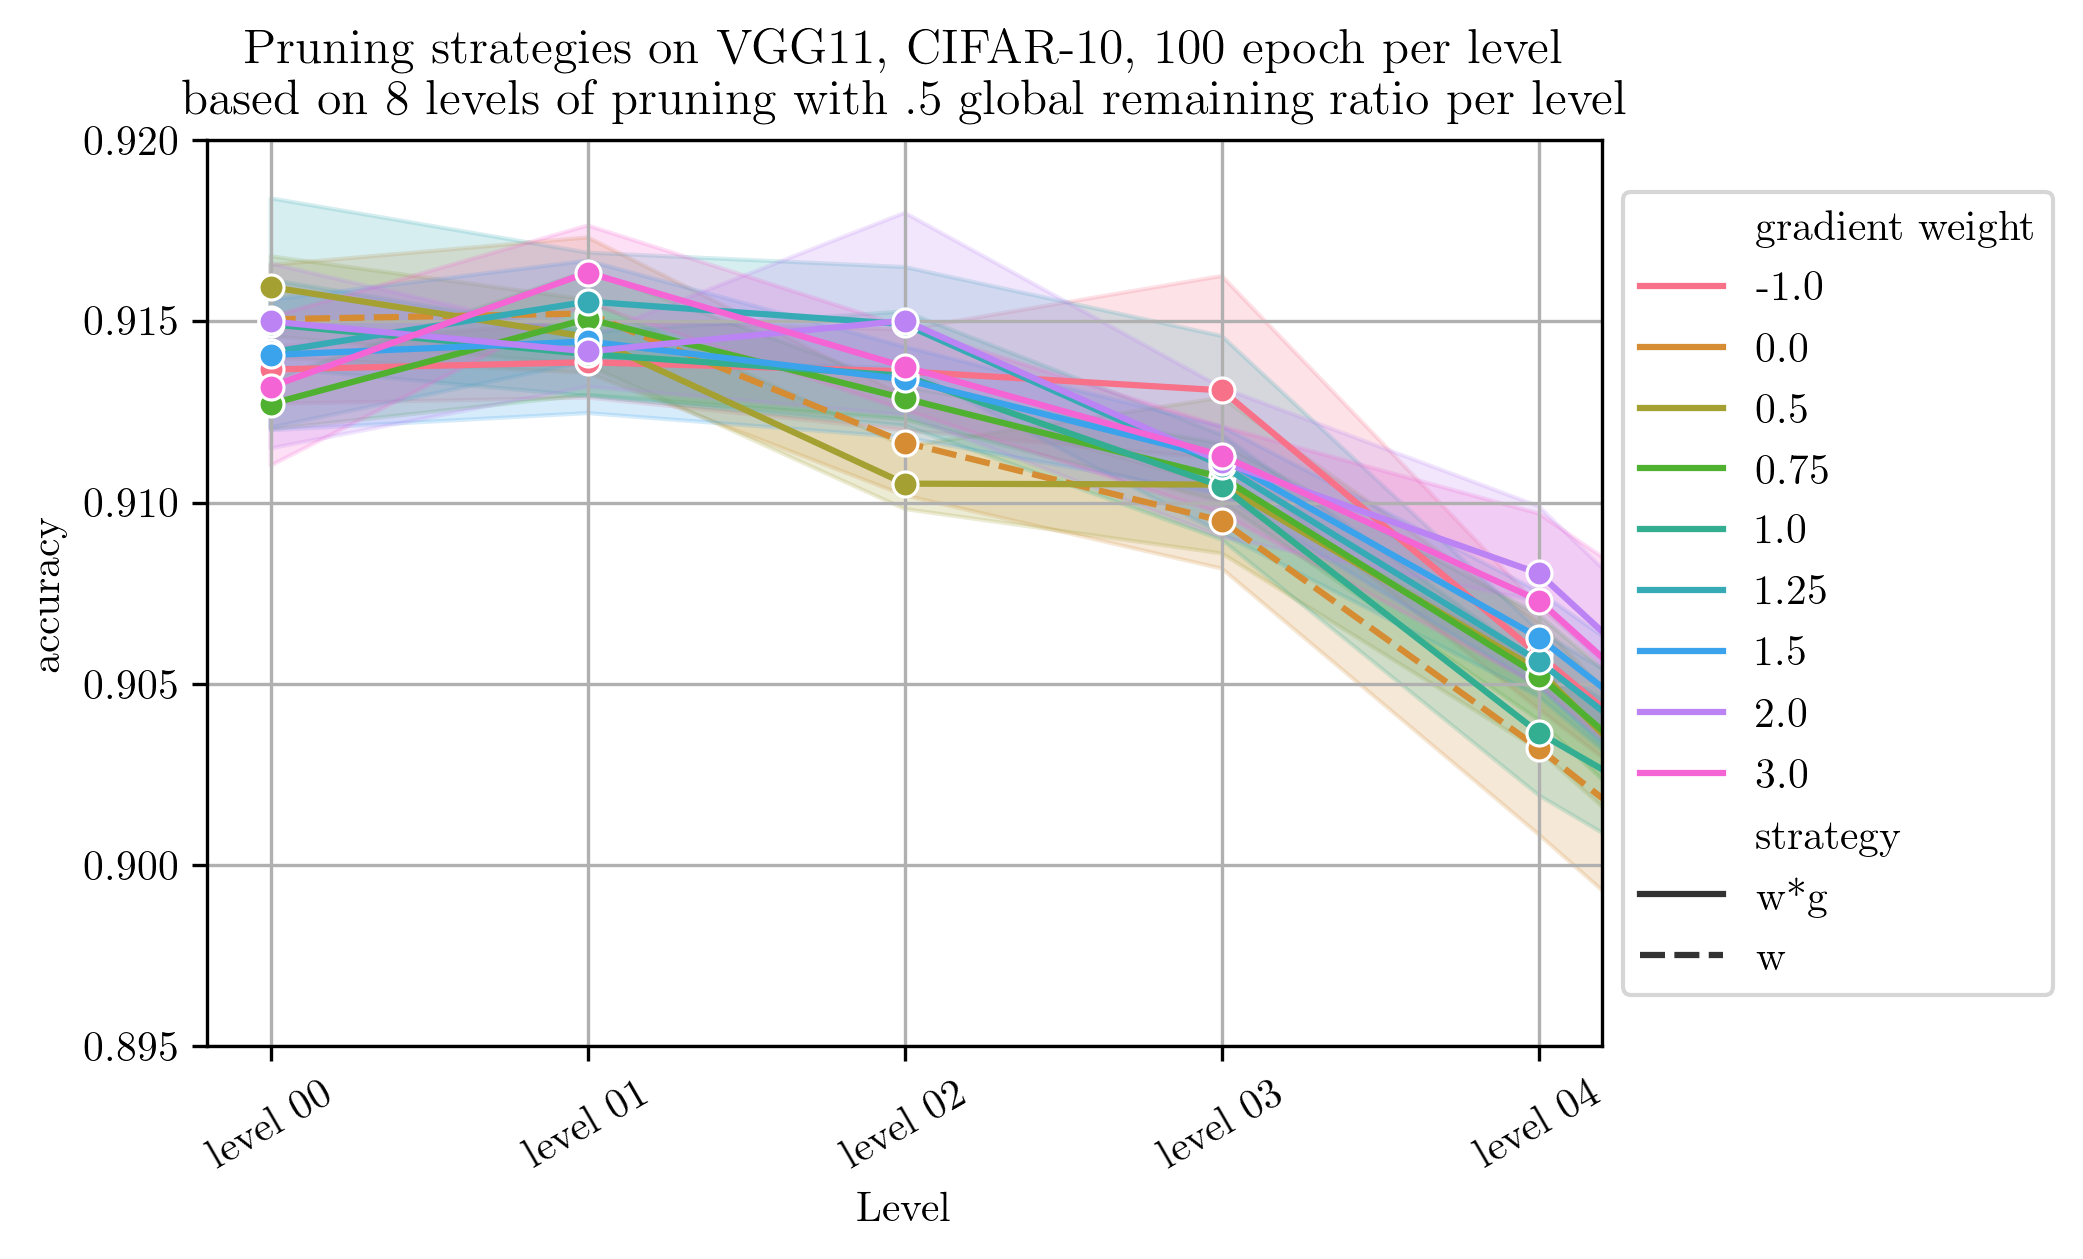

In [297]:

df = df_unfiltered.query('model_name == "cifar_vgg_11"').sort_values(['gradient weight', 'unpruned'])
plt.figure(figsize=(6,4), facecolor='white', dpi=300)
plt.tight_layout()
ax = sns.lineplot(x="level", y="accuracy", data=df, style='strategy', hue='gradient weight', marker = 'o', ci=99,
                  err_style='band', err_kws={'alpha':0.2}, palette = sns.color_palette("husl", len(df['gradient weight'].unique())))
ax.set_title('Pruning strategies on VGG11, CIFAR-10, 100 epoch per level\nbased on 8 levels of pruning with .5 global remaining ratio per level')
ax.set_xlabel('Level')
ax.legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)
ax.set_ylim((0.895, 0.92))
ax.set_xlim((-0.2, 4.2))
ax.grid()


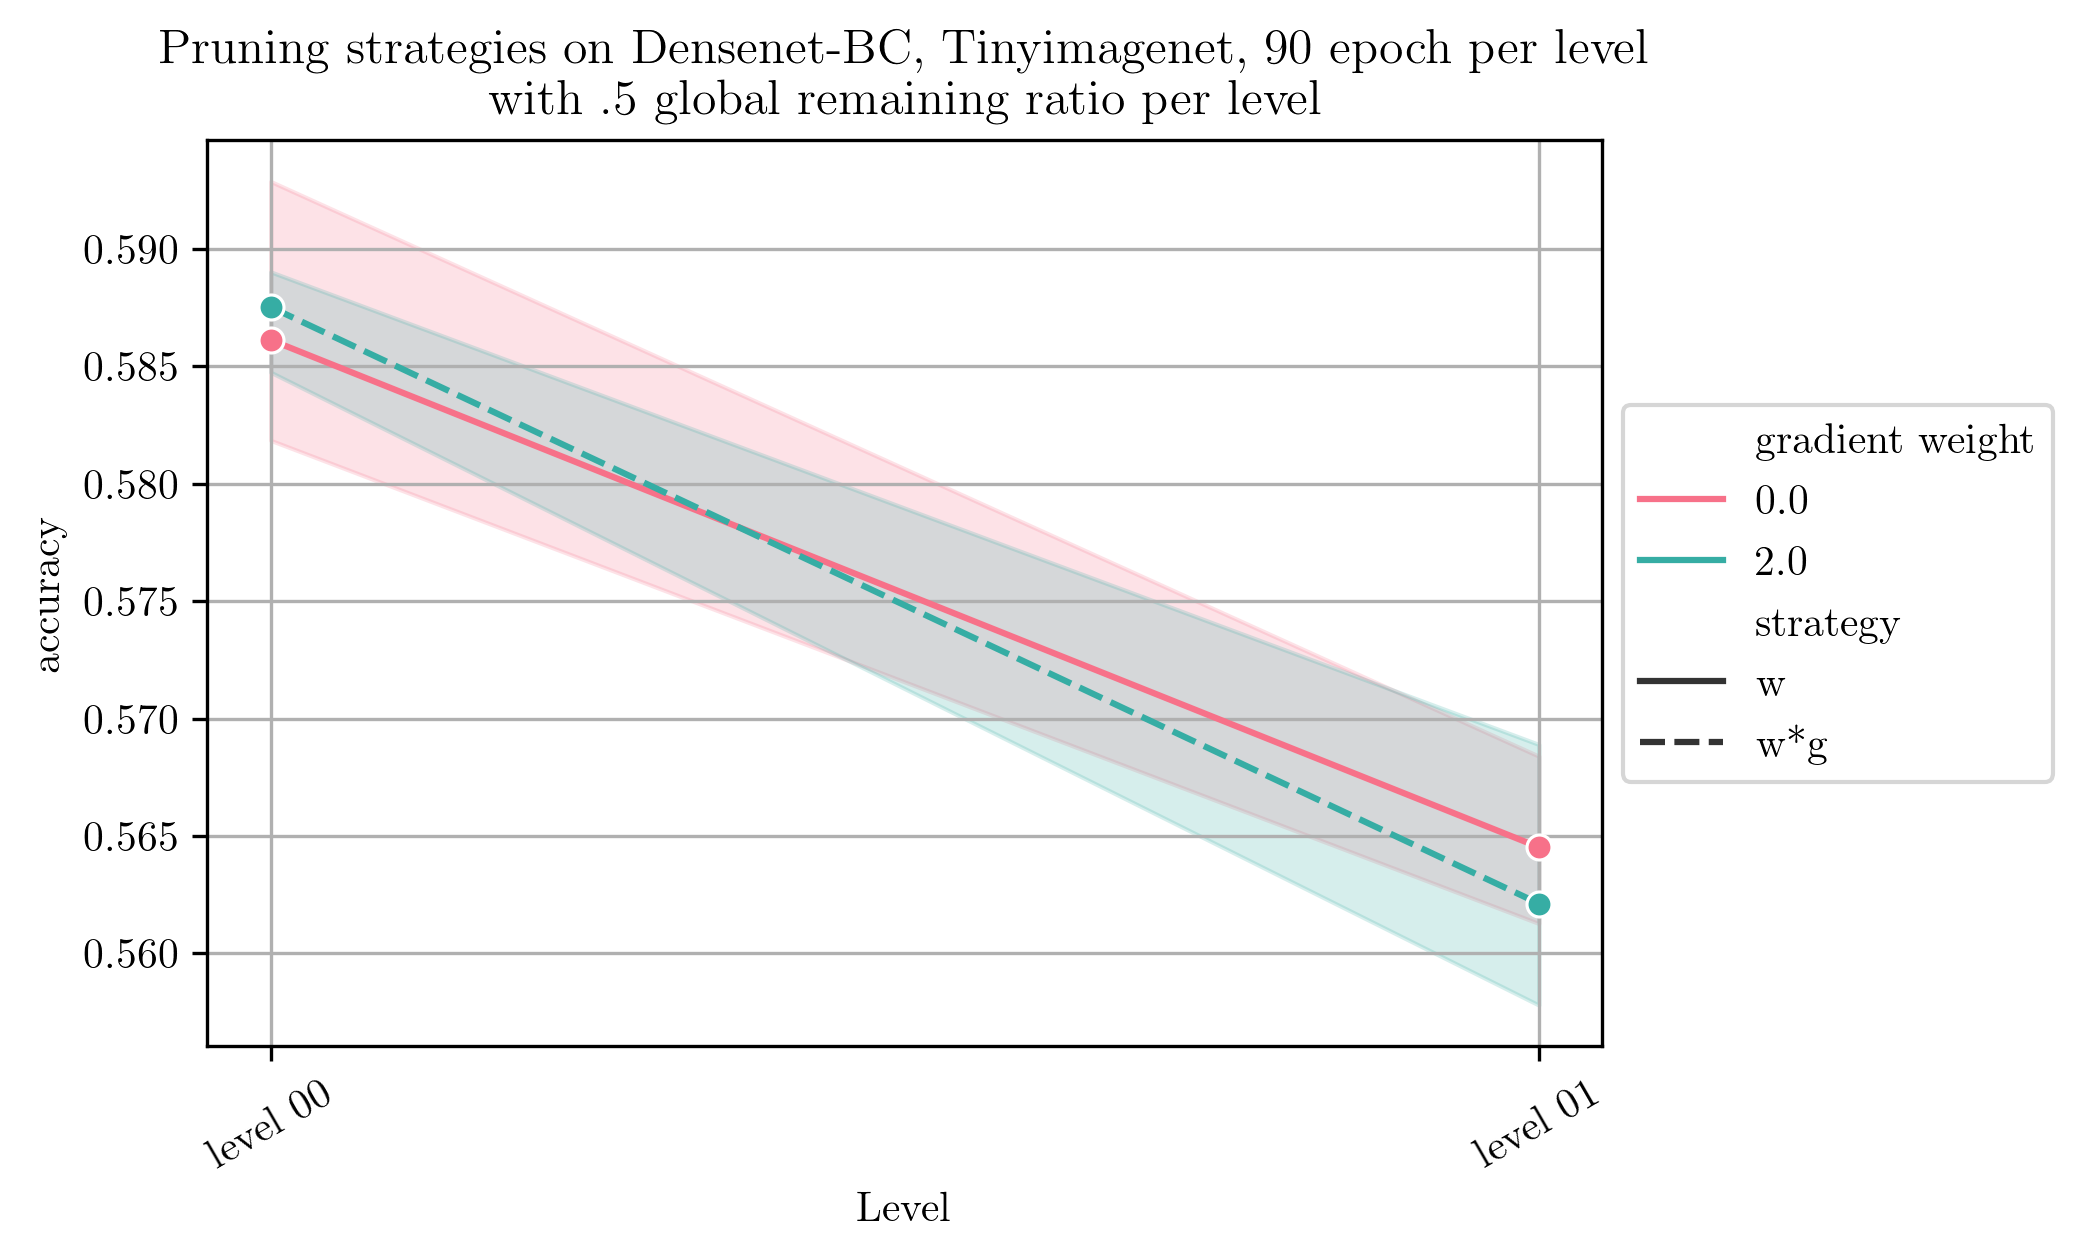

In [304]:
df = df_unfiltered.query('model_name == "densenet_BC_tinyimagenet"').sort_values(['gradient weight', 'unpruned'])
plt.figure(figsize=(6,4), facecolor='white', dpi=300)
plt.tight_layout()
ax = sns.lineplot(x="level", y="accuracy", data=df, style='strategy', hue='gradient weight', marker = 'o', ci=99,
                  err_style='band', err_kws={'alpha':0.2}, palette = sns.color_palette("husl", len(df['gradient weight'].unique())))
ax.set_title('Pruning strategies on Densenet-BC, Tinyimagenet, 90 epoch per level\nwith .5 global remaining ratio per level')
ax.set_xlabel('Level')
ax.legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)
#ax.set_ylim((0.926, 0.94))
#ax.set_xlim((-0.1, 4.1))
ax.grid()


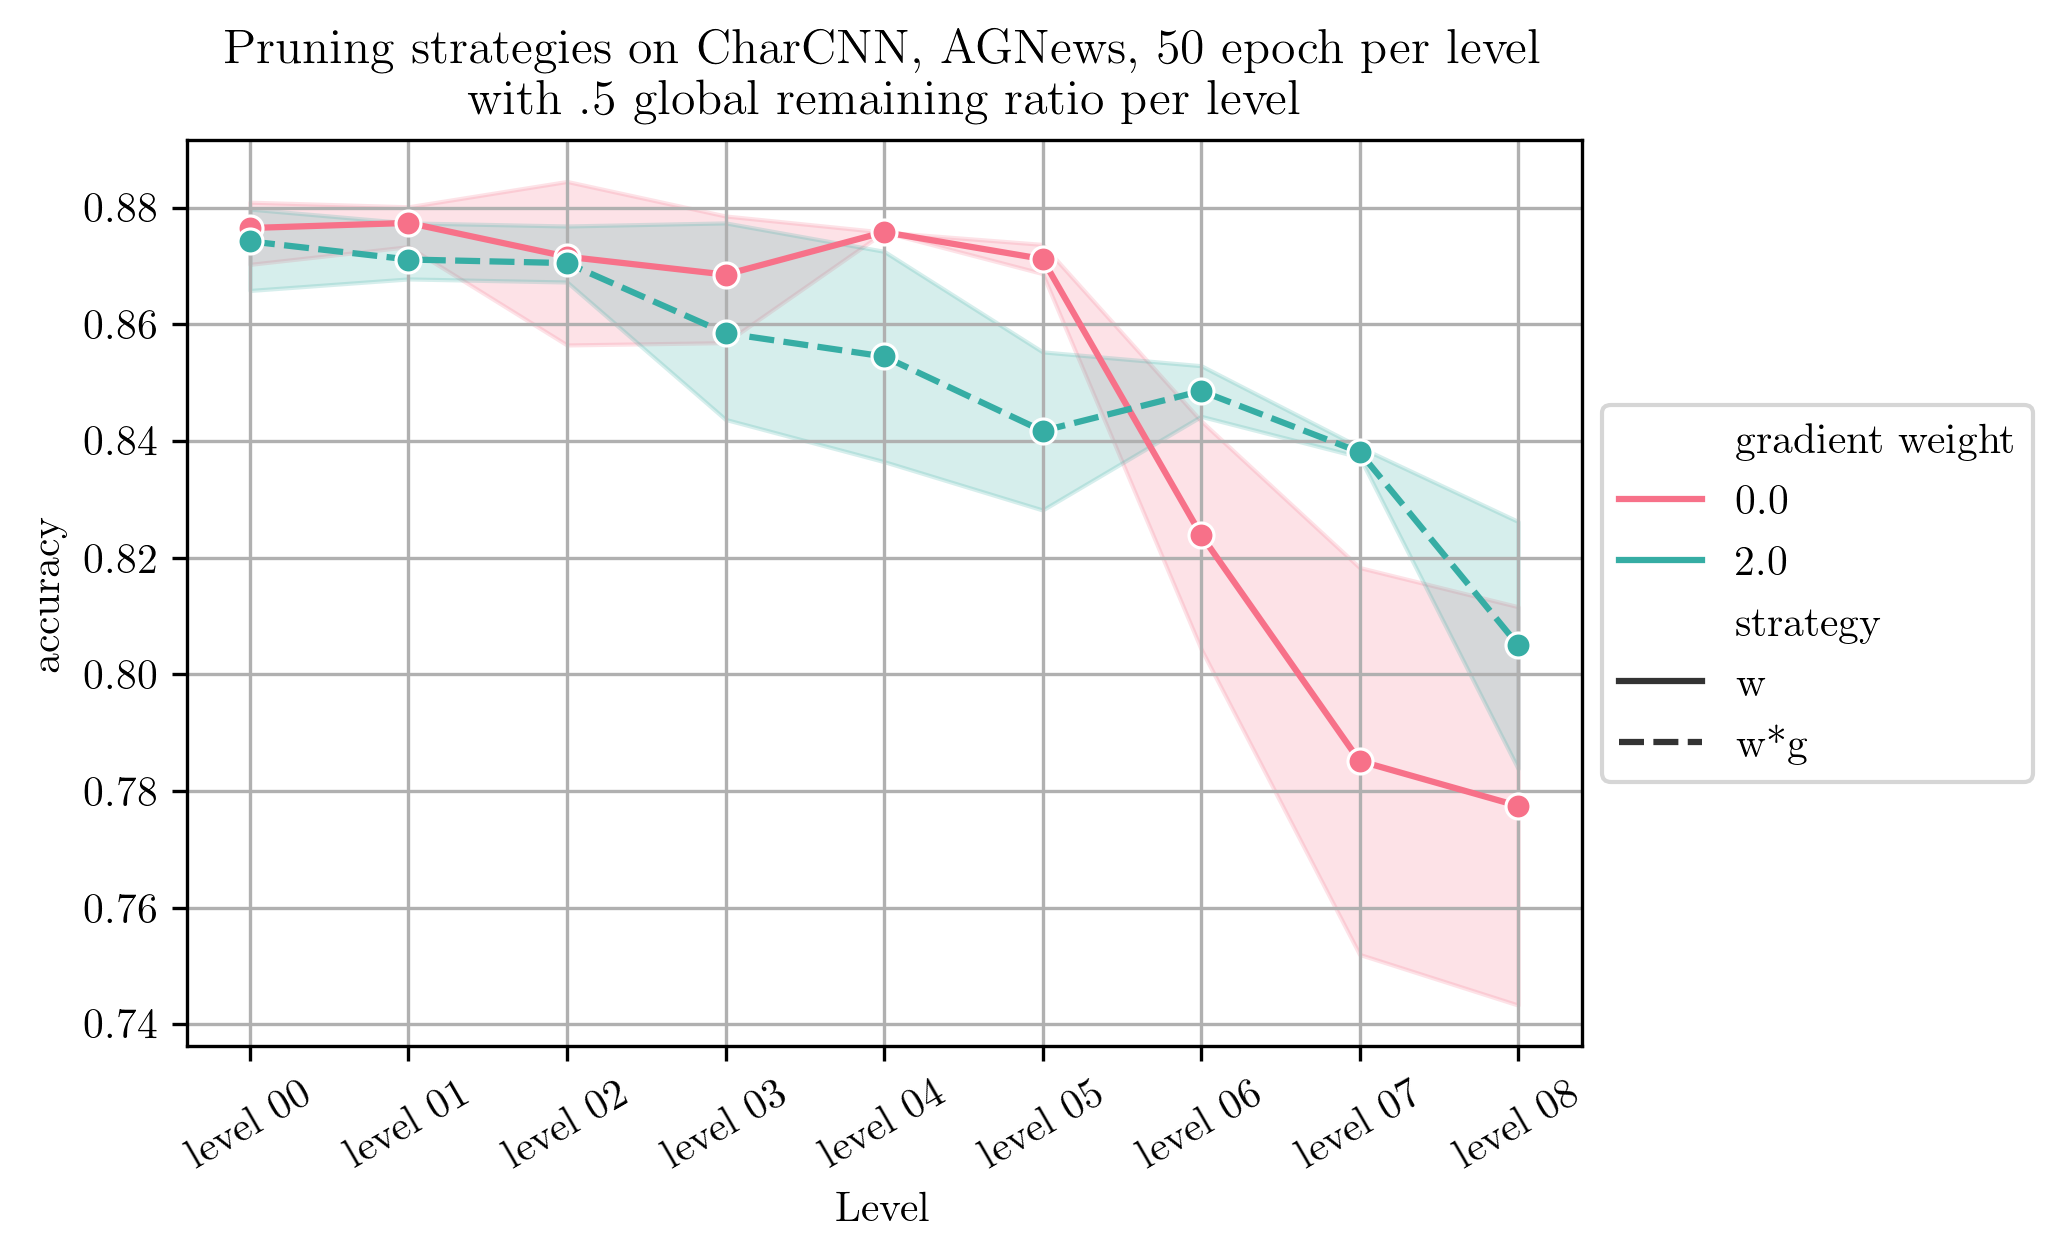

In [305]:
df = df_unfiltered.query('model_name == "charcnn"').sort_values(['gradient weight', 'unpruned'])
plt.figure(figsize=(6,4), facecolor='white', dpi=300)
plt.tight_layout()
ax = sns.lineplot(x="level", y="accuracy", data=df, style='strategy', hue='gradient weight', marker = 'o', ci=99,
                  err_style='band', err_kws={'alpha':0.2}, palette = sns.color_palette("husl", len(df['gradient weight'].unique())))
ax.set_title('Pruning strategies on CharCNN, AGNews, 50 epoch per level\nwith .5 global remaining ratio per level')
ax.set_xlabel('Level')
ax.legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)
#ax.set_ylim((0.926, 0.94))
#ax.set_xlim((-0.1, 4.1))
ax.grid()


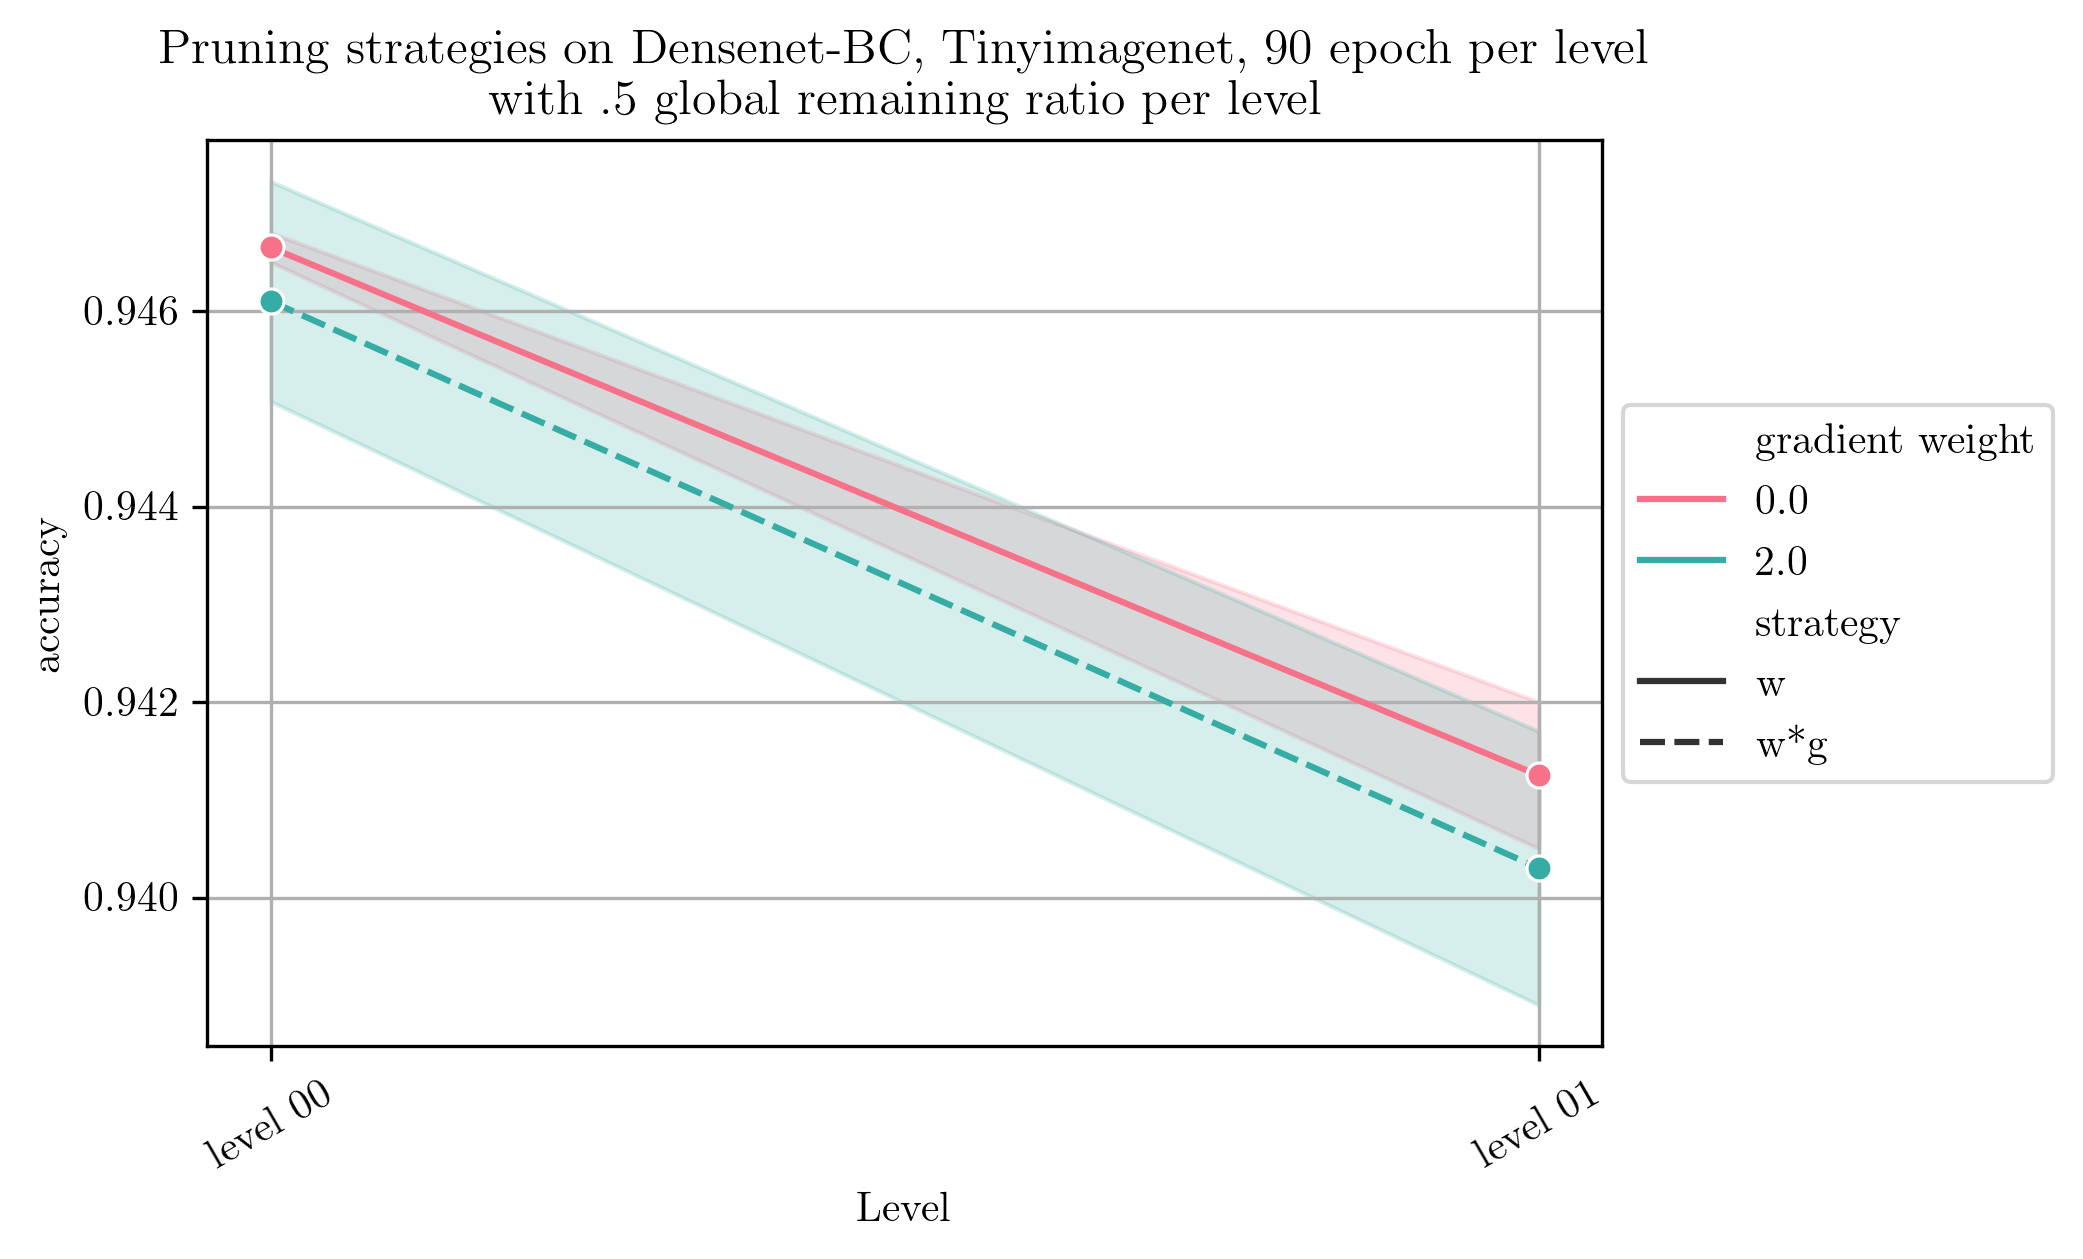

In [307]:
df = df_unfiltered.query('model_name == "densenet_BC_cifar" and epochs').sort_values(['gradient weight', 'unpruned'])
plt.figure(figsize=(6,4), facecolor='white', dpi=300)
plt.tight_layout()
ax = sns.lineplot(x="level", y="accuracy", data=df, style='strategy', hue='gradient weight', marker = 'o', ci=99,
                  err_style='band', err_kws={'alpha':0.2}, palette = sns.color_palette("husl", len(df['gradient weight'].unique())))
ax.set_title('Pruning strategies on Densenet-BC, CIFAR10, 90 epoch per level\nwith .5 global remaining ratio per level')
ax.set_xlabel('Level')
ax.legend(loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))
plt.setp(ax.xaxis.get_majorticklabels(), rotation=30)
#ax.set_ylim((0.926, 0.94))
#ax.set_xlim((-0.1, 4.1))
ax.grid()


In [309]:
df

,replicate_id,level,accuracy,unpruned,pruning_strategy,epochs_per_level,experiment_name,gradient weight,fraction,model_name,no. of params,strategy
1,replicate_1,level 01,0.9405,0.499999,sparse global,90.0,lottery_7443fa4f47c00746c859c40374643510,0.0,0.5,densenet_BC_cifar,7.357772e+06,w
3,replicate_3,level 01,0.9420,0.499999,sparse global,90.0,lottery_7443fa4f47c00746c859c40374643510,0.0,0.5,densenet_BC_cifar,7.357772e+06,w
0,replicate_1,level 00,0.9465,1.000000,sparse global,90.0,lottery_7443fa4f47c00746c859c40374643510,0.0,0.5,densenet_BC_cifar,1.471558e+07,w
2,replicate_3,level 00,0.9468,1.000000,sparse global,90.0,lottery_7443fa4f47c00746c859c40374643510,0.0,0.5,densenet_BC_cifar,1.471558e+07,w
1,replicate_1,level 01,0.9417,0.499999,snip global,90.0,lottery_a9851d1fc4de9809192546e9d2e01bd4,2.0,0.5,densenet_BC_cifar,7.357772e+06,w*g
4,replicate_3,level 01,0.9389,0.499999,snip global,90.0,lottery_a9851d1fc4de9809192546e9d2e01bd4,2.0,0.5,densenet_BC_cifar,7.357772e+06,w*g
0,replicate_1,level 00,0.9465,1.000000,snip global,90.0,lottery_a9851d1fc4de9809192546e9d2e01bd4,2.0,0.5,densenet_BC_cifar,1.471558e+07,w*g
2,replicate_2,level 00,0.9450,1.000000,snip global,90.0,lottery_a9851d1fc4de9809192546e9d2e01bd4,2.0,0.5,densenet_BC_cifar,1.471558e+07,w*g
3,replicate_3,level 00,0.9453,1.000000,snip global,90.0,lottery_a9851d1fc4de9809192546e9d2e01bd4,2.0,0.5,densenet_BC_cifar,1.471558e+07,w*g
5,replicate_4,level 00,0.9476,1.000000,snip global,90.0,lottery_a9851d1fc4de9809192546e9d2e01bd4,2.0,0.5,densenet_BC_cifar,1.471558e+07,w*g
